# Homework 03 - Classification

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split

## Dataset

In this homework, we will use the lead scoring dataset Bank Marketing dataset. Download it from [here](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv).

Or you can do it with `wget`:

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv
```

In this dataset our desired target for classification task will be `converted` variable - has the client signed up to the platform or not.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv')
df

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1
...,...,...,...,...,...,...,...,...,...
1457,referral,manufacturing,1,NaN,self_employed,north_america,4,0.53,1
1458,referral,technology,3,65259.0,student,europe,2,0.24,1
1459,paid_ads,technology,1,45688.0,student,north_america,3,0.02,1
1460,referral,NaN,5,71016.0,self_employed,north_america,0,0.25,1


In [3]:
df.dtypes

lead_source                  object
industry                     object
number_of_courses_viewed      int64
annual_income               float64
employment_status            object
location                     object
interaction_count             int64
lead_score                  float64
converted                     int64
dtype: object

## Data preparation

* Check if the missing values are presented in the features.
* If there are missing values:
    * For categorical features, replace them with 'NA'
    * For numerical features, replace with with 0.0 



In [4]:
# Sum of null values in each column
def list_null_values(df):
    return df.isnull().sum()

In [5]:
# Function to fill missing values with a value
def fill_null_values(df, cat_fill_value, num_fill_value):
    cat_columns = df.select_dtypes(include=['object']).columns
    num_columns = df.select_dtypes(include=['int64','float64']).columns
    
    # Fill NaNs for categorical columns with the provided value
    df[cat_columns] = df[cat_columns].fillna(cat_fill_value)
    
    # Fill NaNs for numerical columns with the provided value
    df[num_columns] = df[num_columns].fillna(num_fill_value)
    
    return df

In [6]:
list_null_values(df)

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [7]:
df =fill_null_values(df=df, cat_fill_value='NA', num_fill_value=0.0)
df

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NA,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NA,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1
...,...,...,...,...,...,...,...,...,...
1457,referral,manufacturing,1,0.0,self_employed,north_america,4,0.53,1
1458,referral,technology,3,65259.0,student,europe,2,0.24,1
1459,paid_ads,technology,1,45688.0,student,north_america,3,0.02,1
1460,referral,NA,5,71016.0,self_employed,north_america,0,0.25,1


In [8]:
list_null_values(df)

lead_source                 0
industry                    0
number_of_courses_viewed    0
annual_income               0
employment_status           0
location                    0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64

## Question 1

What is the most frequent observation (mode) for the column `industry`?

- [ ] `NA`
- [ ] `technology`
- [ ] `healthcare`
- [x] `retail`



In [9]:
def most_frequent_element(df, cat_column):
    # Get the frequency of each unique element in the 'Category' column
    freq = df[cat_column].value_counts()

    # Convert to list of tuples (element, frequency)
    freq_list = list(freq.items())
    
    # Find the mode (most frequent value)
    mode_value = freq.idxmax()  # The most frequent value

    print("Frequency List:", freq_list)
    print(f"Most frequent element or Mode of {cat_column} column is:", mode_value)

    

In [10]:
most_frequent_element(df=df, cat_column='industry')

Frequency List: [('retail', 203), ('finance', 200), ('other', 198), ('healthcare', 187), ('education', 187), ('technology', 179), ('manufacturing', 174), ('NA', 134)]
Most frequent element or Mode of industry column is: retail


## Question 2

Create the [correlation matrix](https://www.google.com/search?q=correlation+matrix) for the numerical features of your dataset.
In a correlation matrix, you compute the correlation coefficient between every pair of features.

What are the two features that have the biggest correlation?

- `interaction_count` and `lead_score`
- `number_of_courses_viewed` and `lead_score`
- `number_of_courses_viewed` and `interaction_count`
- [x] `annual_income` and `interaction_count`

Only consider the pairs above when answering this question.


In [11]:
# Function that returns numeric columns
def num_columns(df):
    num_columns = df.select_dtypes(include=['int64','float64']).columns
    return num_columns

In [12]:
def correlation_matrix(df, columns):
    correlation_matrix=df[columns].corr()
    plt.figure(figsize=(10,6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix Heatmap')
    plt.show()
    

In [13]:
# drop 'converted' is a boolean column
num_columns_df=df.drop('converted', axis=1)

In [14]:
# numeric columns
num_columns = num_columns(num_columns_df)
num_columns

Index(['number_of_courses_viewed', 'annual_income', 'interaction_count',
       'lead_score'],
      dtype='object')

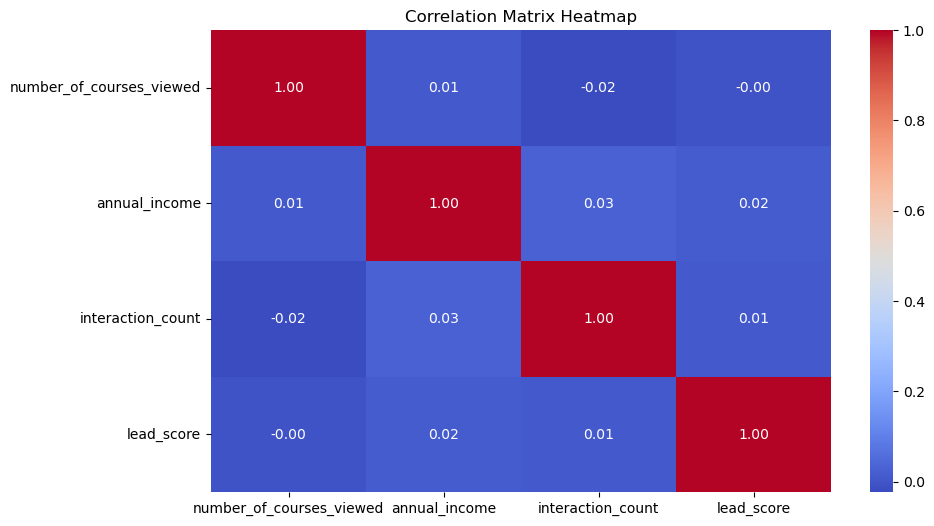

In [15]:
correlation_matrix(df=df, columns=num_columns)

`annual_income` and `interaction_count` have the highest correlation

## Split the data

- Split your data in train/val/test sets with 60%/20%/20% distribution.
- Use Scikit-Learn for that (the `train_test_split` function) and set the seed to `42`.
- Make sure that the target value `converted` is not in your dataframe.

The train_test_split function divides the dataframe into two parts, with 80% for the full train set and 20% for the test set. We use random_state=1 to ensure that the results are reproducible.

In [16]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
len(df_full_train), len(df_test)

(1169, 293)

In [17]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)
len(df_train), len(df_val)

(876, 293)

In [18]:
df_full_train = df_full_train.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [19]:
y_full_train = df_full_train.converted.values
y_train = df_train.converted.values
y_val = df_val.converted.values
y_test = df_test.converted.values

In [20]:
del df_full_train['converted']
del df_train['converted']
del df_val['converted']
del df_test['converted'] 

In [21]:
df_full_train.dtypes

lead_source                  object
industry                     object
number_of_courses_viewed      int64
annual_income               float64
employment_status            object
location                     object
interaction_count             int64
lead_score                  float64
dtype: object

## Question 3

- Calculate the mutual information score between `converted` and other categorical variables in the dataset. Use the training set only.
- Round the scores to 2 decimals using `round(score, 2)`.

Which of these variables has the biggest mutual information score?

- [ ] `industry`
- [ ] `location`
- [x] `lead_source`
- [ ] `employment_status`

In [22]:
from sklearn.metrics import mutual_info_score

In [23]:
categorical = list(df_full_train.select_dtypes(include=['object']).columns)

In [24]:
for i in categorical:
    print(f"{i}: ",round(mutual_info_score(y_train, df_train[i]),3))

lead_source:  0.035
industry:  0.012
employment_status:  0.013
location:  0.004


## Question 4

- Now let's train a logistic regression.
- Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
- Fit the model on the training dataset.
  - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
  - `model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)`
- Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

What accuracy did you get?

- [x] 0.64
- [ ] 0.74
- [ ] 0.84
- [ ] 0.94

In [25]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [26]:
categorical = list(df_full_train.select_dtypes(include=['object']).columns)
numerical =list(df_full_train.select_dtypes(include=['int64','float64']).columns)

In [27]:
categorical 

['lead_source', 'industry', 'employment_status', 'location']

In [28]:
# One-hot encoding
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

test_dict = df_test[categorical + numerical].to_dict(orient='records')
X_test = dv.transform(test_dict)

In [29]:
# Initialization of logistic regression model
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)

# Train model
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [35]:
# Predict on the test data 
y_pred = model.predict(X_test)

# Evaluate accuracy 
accuracy_test = accuracy_score(y_test, y_pred)

print(f"Accuracy: {round(accuracy_test,4)}")

Accuracy: 0.727


In [31]:
accuracy_test

0.726962457337884

In [34]:
# Predict on the validation data 
y_pred = model.predict(X_val)

# Evaluate accuracy
accuracy_val = accuracy_score(y_val, y_pred)

print(f"Accuracy: {round(accuracy_val,4)}")

Accuracy: 0.6997


## Question 5

- Let's find the least useful feature using the _feature elimination_ technique.
- Train a model using the same features and parameters as in Q4 (without rounding).
- Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
- For each feature, calculate the difference between the original accuracy and the accuracy without the feature.

Which of following feature has the smallest difference?

- [ ] `'industry'`
- [ ] `'employment_status'`
- [x] `'lead_score'`

> **Note**: The difference doesn't have to be positive.




In [184]:
features_exclude= categorical + numerical

In [185]:
features_exclude

['lead_source',
 'industry',
 'employment_status',
 'location',
 'number_of_courses_viewed',
 'annual_income',
 'interaction_count',
 'lead_score']

In [186]:
df_test

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score
0,social_media,manufacturing,2,56070.0,self_employed,middle_east,2,0.23
1,NA,other,1,78409.0,NA,australia,4,0.79
2,referral,manufacturing,2,66206.0,employed,australia,3,0.30
3,events,retail,0,0.0,self_employed,north_america,2,0.98
4,organic_search,retail,6,62832.0,unemployed,NA,4,1.00
...,...,...,...,...,...,...,...,...
288,referral,other,2,58981.0,student,europe,3,0.20
289,organic_search,education,1,79448.0,unemployed,north_america,4,0.38
290,NA,education,5,66922.0,employed,europe,5,0.53
291,referral,healthcare,4,82306.0,self_employed,middle_east,3,0.25


In [187]:
def feature_elimination(df_test,df_train,y_train, y_test,features, original_accuracy):
    accuracy_differences={}
    for feature in features:
        #df_train = df_train.drop(columns=[feature])
        #df_test = df_test.drop(columns=[feature])
        features_excluded=features.copy()
        features_excluded.remove(feature)
        
        # One-hot encoding
        dv = DictVectorizer(sparse=False)
        
        train_dict = df_train[ features_excluded].to_dict(orient='records')
        X_train = dv.fit_transform(train_dict)

        test_dict = df_test[ features_excluded].to_dict(orient='records')
        X_test = dv.transform(test_dict)
    
        # Initialization of logistic regression model
        model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
        
        # Train model
        model.fit(X_train, y_train)
        
        # Predict on the test data 
        y_pred = model.predict(X_test)
        
        # Evaluate accuracy
        accuracy = accuracy_score(y_test, y_pred)

        # Calculate the difference between the original accuracy and the new accuracy
        accuracy_difference = abs(original_accuracy - accuracy)
        accuracy_differences[feature] = accuracy_difference
        
        print(f"Without {feature} the accuracy is: {accuracy} and the accuracy difference is: {accuracy_difference}")
        
    print ("\n")
    min_accuracy_key = min(accuracy_differences, key=accuracy_differences.get)
    print(f"Which of following feature has the smallest difference? {min_accuracy_key}")

In [188]:
feature_elimination(df_test,df_train,y_train, y_test,features=features_exclude, original_accuracy=accuracy_test )

Without lead_source the accuracy is: 0.7303754266211604 and the accuracy difference is: 0.0034129692832763903
Without industry the accuracy is: 0.7372013651877133 and the accuracy difference is: 0.010238907849829282
Without employment_status the accuracy is: 0.7406143344709898 and the accuracy difference is: 0.013651877133105783
Without location the accuracy is: 0.726962457337884 and the accuracy difference is: 0.0
Without number_of_courses_viewed the accuracy is: 0.6689419795221843 and the accuracy difference is: 0.058020477815699745
Without annual_income the accuracy is: 0.8191126279863481 and the accuracy difference is: 0.09215017064846409
Without interaction_count the accuracy is: 0.6655290102389079 and the accuracy difference is: 0.061433447098976135
Without lead_score the accuracy is: 0.7337883959044369 and the accuracy difference is: 0.0068259385665528916


Which of following feature has the smallest difference? location


Between `'industry'`, `'employment_status'`, and `'lead_score'`, this last one has the smallest difference.

## Question 6

- Now let's train a regularized logistic regression.
- Let's try the following values of the parameter `C`: `[0.01, 0.1, 1, 10, 100]`.
- Train models using all the features as in Q4.
- Calculate the accuracy on the validation dataset and round it to 3 decimal digits.

Which of these `C` leads to the best accuracy on the validation set?

- [x] 0.01
- [x] 0.1
- [x] 1
- [x] 10
- [x] 100

> **Note**: If there are multiple options, select the smallest `C`.

In [193]:

for c in [0.01, 0.1, 1, 10, 100]:
    # Initialization of logistic regression model
    model = LogisticRegression(solver='liblinear', C=c, max_iter=1000, random_state=42)
        
    # Train model
    model.fit(X_train, y_train)
        

    # Predict on the validation data 
    y_pred = model.predict(X_val)

    # Evaluate accuracy
    accuracy_val = accuracy_score(y_val, y_pred)

    print(f"C: {c} - Accuracy: {round(accuracy_val,4)}")

C: 0.01 - Accuracy: 0.6997
C: 0.1 - Accuracy: 0.6997
C: 1 - Accuracy: 0.6997
C: 10 - Accuracy: 0.6997
C: 100 - Accuracy: 0.6997
